In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [59]:
df = pd.read_csv('Moscow_2021.csv', sep=';', parse_dates=['2021'], dayfirst=True, index_col='2021')
df.head()

,Sunrise,Noon,Sunset,Length,Change,AT_east,NT_east,CT_east,CT_west,NT_west,AT_west
2021,,,,,,,,,,,
2021-01-01,9:00:29,12:34:13,16:07:58,7:07,+1:21,6:40:27,7:25:37,8:14:03,16:54:24,17:42:50,18:28:00
2021-01-02,9:00:12,12:34:41,16:09:10,7:08,+1:29,6:40:24,7:25:31,8:13:52,16:55:29,17:43:51,18:28:58
2021-01-03,8:59:51,12:35:08,16:10:25,7:10,+1:36,6:40:17,7:25:22,8:13:39,16:56:37,17:44:54,18:29:59
2021-01-04,8:59:26,12:35:35,16:11:44,7:12,+1:44,6:40:08,7:25:09,8:13:21,16:57:48,17:46:00,18:31:02
2021-01-05,8:58:57,12:36:01,16:13:06,7:14,+1:51,6:39:56,7:24:54,8:13:01,16:59:02,17:47:08,18:32:07


In [60]:
df.dtypes

Sunrise    object
Noon       object
Sunset     object
Length     object
Change     object
AT_east    object
NT_east    object
CT_east    object
CT_west    object
NT_west    object
AT_west    object
dtype: object

In [73]:
dft = df.copy()
dft = dft.drop(['Length', 'Change'], axis=1)
dft.loc[:, ['AT_east', 'AT_west', 'NT_east', 'NT_west']] = dft.loc[:, ['AT_east', 'AT_west',
                                                                       'NT_east', 'NT_west']].mask(dft == '?', None)
# dft.loc[:, ['AT_east', 'NT_east']] = dft.loc[:, ['AT_west', 'NT_west']].mask(dft == '?', '0:00:00')
# dft.loc[:, ['AT_east', 'NT_east']] = dft.loc[:, ['AT_east', 'NT_east']].mask(dft == '?', '23:59:59')
dft.head()

,Sunrise,Noon,Sunset,AT_east,NT_east,CT_east,CT_west,NT_west,AT_west
2021,,,,,,,,,
2021-01-01,9:00:29,12:34:13,16:07:58,6:40:27,7:25:37,8:14:03,16:54:24,17:42:50,18:28:00
2021-01-02,9:00:12,12:34:41,16:09:10,6:40:24,7:25:31,8:13:52,16:55:29,17:43:51,18:28:58
2021-01-03,8:59:51,12:35:08,16:10:25,6:40:17,7:25:22,8:13:39,16:56:37,17:44:54,18:29:59
2021-01-04,8:59:26,12:35:35,16:11:44,6:40:08,7:25:09,8:13:21,16:57:48,17:46:00,18:31:02
2021-01-05,8:58:57,12:36:01,16:13:06,6:39:56,7:24:54,8:13:01,16:59:02,17:47:08,18:32:07


In [75]:
df_time = dft.copy()
for column in df_time.columns:
    df_time[column] = pd.to_datetime(df_time[column], format='%H:%M:%S').dt.time
df_time.head()

,Sunrise,Noon,Sunset,AT_east,NT_east,CT_east,CT_west,NT_west,AT_west
2021,,,,,,,,,
2021-01-01,09:00:29,12:34:13,16:07:58,06:40:27,07:25:37,08:14:03,16:54:24,17:42:50,18:28:00
2021-01-02,09:00:12,12:34:41,16:09:10,06:40:24,07:25:31,08:13:52,16:55:29,17:43:51,18:28:58
2021-01-03,08:59:51,12:35:08,16:10:25,06:40:17,07:25:22,08:13:39,16:56:37,17:44:54,18:29:59
2021-01-04,08:59:26,12:35:35,16:11:44,06:40:08,07:25:09,08:13:21,16:57:48,17:46:00,18:31:02
2021-01-05,08:58:57,12:36:01,16:13:06,06:39:56,07:24:54,08:13:01,16:59:02,17:47:08,18:32:07


In [83]:
df_time['NT_west'][0] + dt.timedelta(df_time['NT_west'][1])

TypeError: unsupported type for timedelta days component: datetime.time

In [80]:
df_time['NT_west'].fillna(df_time['NT_west'].mean())

TypeError: unsupported operand type(s) for +: 'datetime.time' and 'datetime.time'

In [38]:
df_time['Sunrise'][0]

datetime.time(9, 0, 29)

In [85]:
dfn = dft.copy()
for column in dft.columns:
    dfn[column] = pd.to_numeric(dfn[column].apply(pd.Timedelta))*1.6666666666667e-11
dfn.head()

,Sunrise,Noon,Sunset,AT_east,NT_east,CT_east,CT_west,NT_west,AT_west
2021,,,,,,,,,
2021-01-01,540.483333,754.216667,967.966667,400.450000,445.616667,494.050000,1014.400000,1062.833333,1108.000000
2021-01-02,540.200000,754.683333,969.166667,400.400000,445.516667,493.866667,1015.483333,1063.850000,1108.966667
2021-01-03,539.850000,755.133333,970.416667,400.283333,445.366667,493.650000,1016.616667,1064.900000,1109.983333
2021-01-04,539.433333,755.583333,971.733333,400.133333,445.150000,493.350000,1017.800000,1066.000000,1111.033333
2021-01-05,538.950000,756.016667,973.100000,399.933333,444.900000,493.016667,1019.033333,1067.133333,1112.116667


In [45]:
dfa = df_time.merge(dfn, left_index=True, right_index=True, suffixes=('_time', '_num'))
dfa = dfa[['AT_east_time', 'AT_east_num',
           'NT_east_time', 'NT_east_num',
           'CT_east_time', 'CT_east_num',
           'Sunrise_time', 'Sunrise_num',
           'Noon_time', 'Noon_num',
           'Sunset_time', 'Sunset_num',
           'CT_west_time', 'CT_west_num',
           'NT_west_time', 'NT_west_num',
           'AT_west_time', 'AT_west_num',
          ]]
dfa.head()

,AT_east_time,AT_east_num,NT_east_time,NT_east_num,CT_east_time,CT_east_num,Sunrise_time,Sunrise_num,Noon_time,Noon_num,Sunset_time,Sunset_num,CT_west_time,CT_west_num,NT_west_time,NT_west_num,AT_west_time,AT_west_num
2021,,,,,,,,,,,,,,,,,,
2021-01-01,06:40:27,400.450000,07:25:37,445.616667,08:14:03,494.050000,09:00:29,540.483333,12:34:13,754.216667,16:07:58,967.966667,16:54:24,1014.400000,17:42:50,1062.833333,18:28:00,1108.000000
2021-01-02,06:40:24,400.400000,07:25:31,445.516667,08:13:52,493.866667,09:00:12,540.200000,12:34:41,754.683333,16:09:10,969.166667,16:55:29,1015.483333,17:43:51,1063.850000,18:28:58,1108.966667
2021-01-03,06:40:17,400.283333,07:25:22,445.366667,08:13:39,493.650000,08:59:51,539.850000,12:35:08,755.133333,16:10:25,970.416667,16:56:37,1016.616667,17:44:54,1064.900000,18:29:59,1109.983333
2021-01-04,06:40:08,400.133333,07:25:09,445.150000,08:13:21,493.350000,08:59:26,539.433333,12:35:35,755.583333,16:11:44,971.733333,16:57:48,1017.800000,17:46:00,1066.000000,18:31:02,1111.033333
2021-01-05,06:39:56,399.933333,07:24:54,444.900000,08:13:01,493.016667,08:58:57,538.950000,12:36:01,756.016667,16:13:06,973.100000,16:59:02,1019.033333,17:47:08,1067.133333,18:32:07,1112.116667


In [58]:
x = dfa.index
fig = go.Figure([
    go.Scatter(name='CT_east', x=x, y=dfa['CT_east_num'], fill='tozeroy', mode='none', hovertemplate=),
    go.Scatter(name='Sunrise', x=x, y=dfa['Sunrise_num'], fill='tonexty'),
    go.Scatter(name='Noon', x=x, y=dfa['Noon_num'], fill='tonexty'),
    go.Scatter(name='Sunset', x=x, y=dfa['Sunset_num'], fill='tonexty'),
    go.Scatter(name='CT_west', x=x, y=dfa['CT_west_num'], fill='tonexty'),
#     go.Scatter(name='_', x=x, y=dfa['the_rest']),
])
fig.update_layout(hovermode='x',
    
                  autosize=False,
                  width=900,
                  height=500,
                  title = {'text': 'Moscow 2021', 'x': .5})
fig['layout']['yaxis']['autorange'] = "reversed"
fig.show()

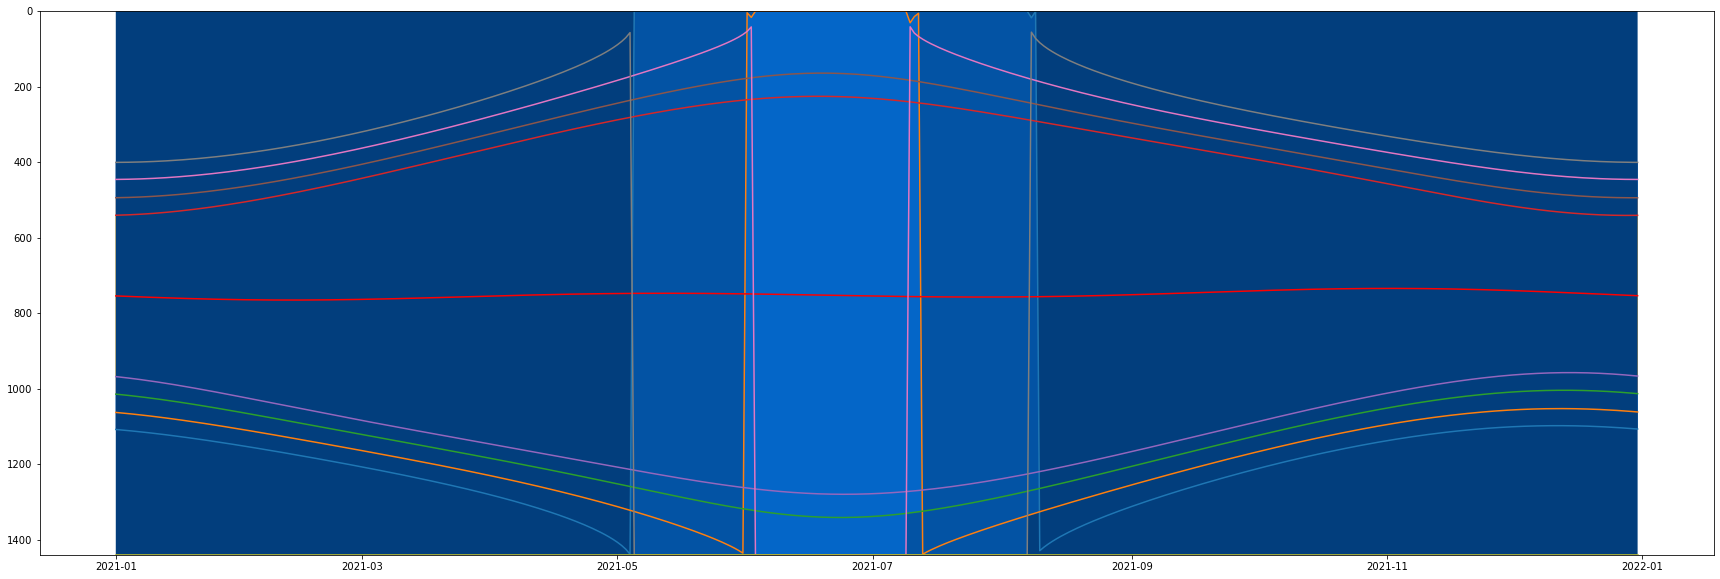

In [12]:
fig, ax = plt.subplots(figsize=(30, 10))
x = dft.index
y = [1440] * len(x)

ax.plot(x, dft['AT_west'])
ax.plot(x, dft['NT_west'])
ax.plot(x, dft['CT_west'])
ax.plot(x, dft['Sunrise'])
ax.plot(x, dft['Noon'], color='red')
ax.plot(x, dft['Sunset'])
ax.plot(x, dft['CT_east'])
ax.plot(x, dft['NT_east'])
ax.plot(x, dft['AT_east'])
ax.plot(x, y)

ax.fill_between(x, dft['AT_east'], y, facecolor='#023e7d')
ax.fill_between(x, dft['NT_east'], dft['AT_east'], facecolor='#0353a4')
ax.fill_between(x, dft['CT_east'], dft['NT_east'], facecolor='#0466c8')
ax.fill_between(x, dft['Sunset'], dft['CT_east'], facecolor='#f4a261')
ax.fill_between(x, dft['Sunrise'], dft['Sunset'], facecolor='yellow')
ax.fill_between(x, dft['CT_west'], dft['Sunrise'], facecolor='#f4a261')
ax.fill_between(x, dft['NT_west'], dft['CT_west'], facecolor='#0466c8')
ax.fill_between(x, dft['AT_west'], dft['NT_west'], facecolor='#0353a4')
ax.fill_between(x, dft['AT_west'], facecolor='#023e7d')

plt.ylim(1440, 0)

# plt.xticks(x, rotation='vertical')
# plt.savefig('Moscow2021.jpeg')

plt.show()

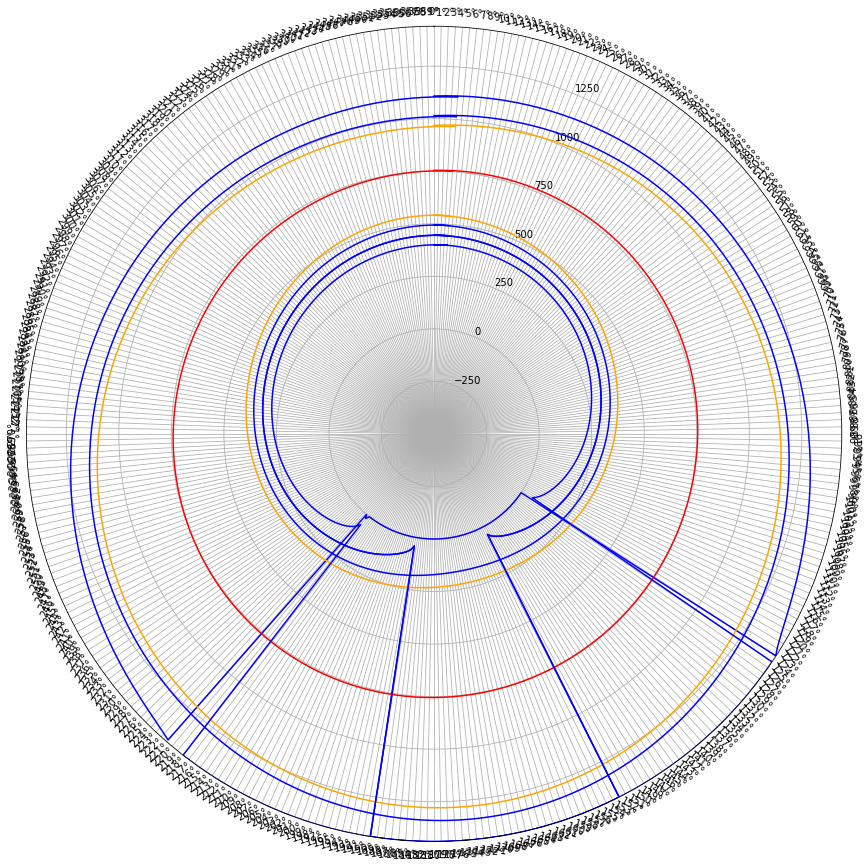

In [14]:
plt.figure(figsize=(15, 15))
ax = plt.subplot(111, polar=True)

x = range(len(dft.index))
ax.plot(np.deg2rad(x), dft['AT_west'], color='blue')
ax.plot(np.deg2rad(x), dft['NT_east'], color='blue')
ax.plot(np.deg2rad(x), dft['CT_west'], color='blue')
ax.plot(np.deg2rad(x), dft['Sunrise'], color='orange')
ax.plot(np.deg2rad(x), dft['Noon'], color='red')
ax.plot(np.deg2rad(x), dft['Sunset'], color='orange')
ax.plot(np.deg2rad(x), dft['CT_east'], color='blue')
ax.plot(np.deg2rad(x), dft['NT_east'], color='blue')
ax.plot(np.deg2rad(x), dft['AT_east'], color='blue')

ax.set_rmax(1440)
ax.set_rmin(-500)

# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(np.pi/2.0)  

ax.set_xticks(np.linspace(0, 2*np.pi, 360, endpoint=False))
# ax.set_xticklabels(dft.index.strftime("%m.%d"))

plt.gcf().canvas.draw()
angles = np.linspace(0,2*np.pi,len(ax.get_xticklabels())+1)
angles[np.cos(angles) < 0] = angles[np.cos(angles) < 0] + np.pi
angles = np.rad2deg(angles)
labels = []
for label, angle in zip(ax.get_xticklabels(), angles):
    x,y = label.get_position()
    lab = ax.text(x,y, label.get_text(), transform=label.get_transform(),
                  ha=label.get_ha(), va=label.get_va())
    lab.set_rotation(angle)
    labels.append(lab)
ax.set_xticklabels([])

ax.grid(True)
plt.show()